In [2]:
import scipy.stats as st
import numpy as np
import pandas as pd
from pandas import Series

In [5]:
st.norm.ppf(q=0.05)

-1.6448536269514729

In [11]:
wein = Series([71, 69, 67, 68, 73, 72, 71, 71, 68, 72, 69, 72])
(wein.mean()-70)/(1.5/np.sqrt(12))

0.5773502691896257

In [12]:
mu = 15.2
std = 0.2203
n = 20
std/np.sqrt(std)/mu

0.03087903079658246

In [22]:
1-st.norm.cdf(x=115, loc=100, scale=36.6)

0.3409631039341816

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
rain = pd.read_csv(r"rainDay.txt",sep=" ", header=None)
rain.columns = ["id","Date", "rain"]
rain["Date"] = pd.DatetimeIndex(rain["Date"])
print(rain["Date"].size)
daily = rain.resample("d")
daily.head()

2922


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

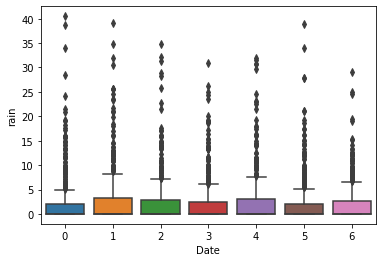

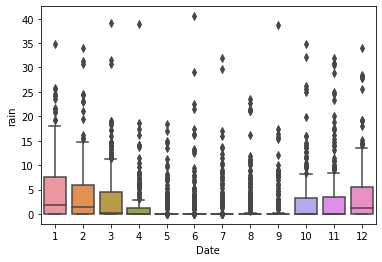

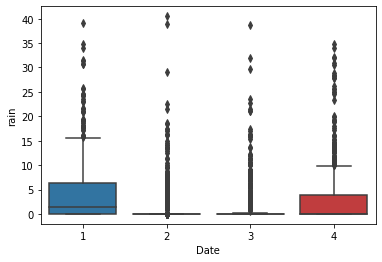

Date
2000-01-01     0.00
2000-02-01    12.90
2000-03-01     0.00
2000-04-01     0.05
2000-05-01     3.55
Name: rain, dtype: float64

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame, Series
import seaborn
import numpy as np
rain = pd.read_csv('rainDay.txt', sep=' ', header=None)
rain["Date"] = pd.DatetimeIndex(rain[1])
rain.set_index("Date", inplace=True)
rain["rain"] = rain[2]
rain_ts = Series(rain["rain"])
seaborn.boxplot(rain_ts.index.weekday, rain_ts)
axs[0].set(xlabel='weekday', ylabel='rain')
plt.show()
seaborn.boxplot(rain_ts.index.month, rain_ts)
axs[1].set(xlabel='month')
plt.show()
seaborn.boxplot(rain_ts.index.quarter, rain_ts)
axs[2].set(xlabel='quarter')
plt.show()
rain_ts.head()

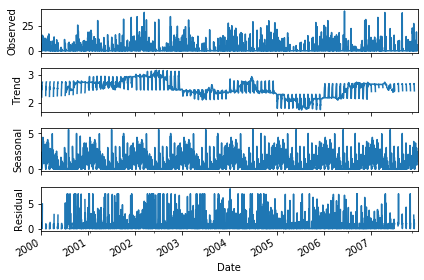

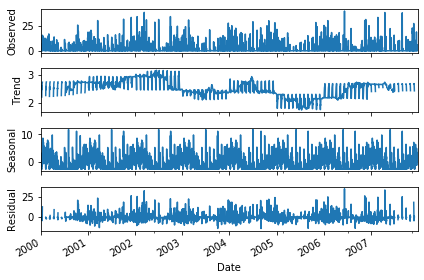

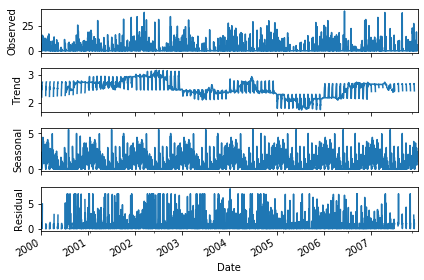

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import seaborn
import numpy as np
rain = pd.read_csv('rainDay.txt', sep=' ', header=None)
rain["Date"] = pd.DatetimeIndex(rain[1])
rain.set_index("Date", inplace=True)
rain["rain"] = rain[2]
rain["rain"] = rain["rain"] + 0.0000000001
rain_ts = Series(rain["rain"])
seasonal_decompose(rain_ts, freq=365, model="additive").plot()
seasonal_decompose(rain_ts, freq=365, model="multiplicative").plot()

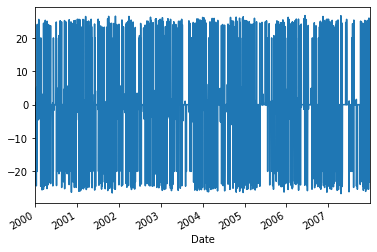

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import seaborn
import numpy as np
rain = pd.read_csv('rainDay.txt', sep=' ', header=None)
rain["Date"] = pd.DatetimeIndex(rain[1])
rain.set_index("Date", inplace=True)
rain["rain"] = rain[2]
rain["rain"] = rain["rain"] + 0.0000000001
rain_ts = Series(rain["rain"])
(np.log(rain_ts) - np.log(rain_ts.shift(1))).plot()
plt.show()